Classify the email using the binary classification method. Email Spam detection has two 
states: a) Normal State – Not Spam, b) Abnormal State – Spam. Use K-Nearest Neighbors and 
Support Vector Machine for classification. Analyze their performance. 
Dataset link: The emails.csv dataset on the Kaggle 
https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv 

In [191]:
import pandas as pd

In [192]:
email = pd.read_csv("emails.csv")

In [193]:
email

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [194]:
email.shape

(5172, 3002)

In [195]:
email.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [196]:
email.tail()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1
5171,Email 5172,22,24,5,1,6,5,148,8,2,...,0,0,0,0,0,0,0,0,0,0


In [197]:
#input data
x = email.drop(['Email No.' , 'Prediction'] , axis=1)

In [198]:
x

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [199]:
x.shape

(5172, 3000)

In [200]:
#output data
y = email['Prediction']

In [201]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3000 entries, the to dry
dtypes: int64(3000)
memory usage: 118.4 MB


In [202]:
x.dtypes

the               int64
to                int64
ect               int64
and               int64
for               int64
                  ...  
infrastructure    int64
military          int64
allowing          int64
ff                int64
dry               int64
Length: 3000, dtype: object

In [203]:
set(x.dtypes)

{dtype('int64')}

<Axes: xlabel='Prediction', ylabel='count'>

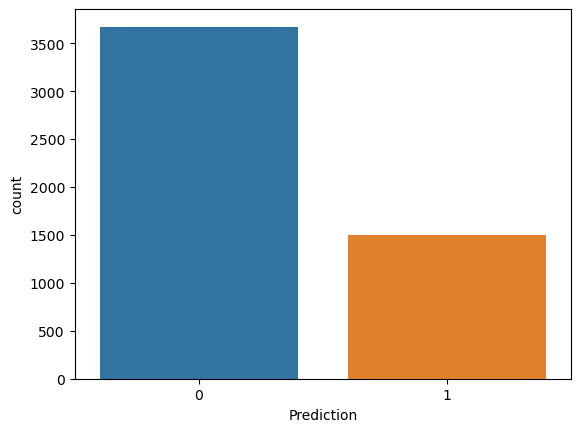

In [204]:
import seaborn as sns
sns.countplot(x = y)

In [205]:
y.value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [206]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()  #object created
x_scaled = scaler.fit_transform(x)

In [207]:
x_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]])

In [208]:
#cross validation
from sklearn.model_selection import train_test_split
x_train , x_text ,y_train , y_text = train_test_split(x_scaled , y ,random_state=0, test_size=0.25)

In [209]:
x_scaled.shape

(5172, 3000)

In [210]:
x_train.shape

(3879, 3000)

In [211]:
x_text.shape

(1293, 3000)

In [212]:
#import the class
from sklearn.neighbors import KNeighborsClassifier


In [213]:
# create the object
# pass the value of k = 5
knn = KNeighborsClassifier(n_neighbors=5)

In [214]:
#Train the algorithm
knn.fit(x_train , y_train) # model is created

KNeighborsClassifier()

In [215]:
#predict on test data
y_pred = knn.predict(x_text)

In [216]:
#import the evalution metrics
from sklearn.metrics import ConfusionMatrixDisplay , accuracy_score
from sklearn.metrics import classification_report

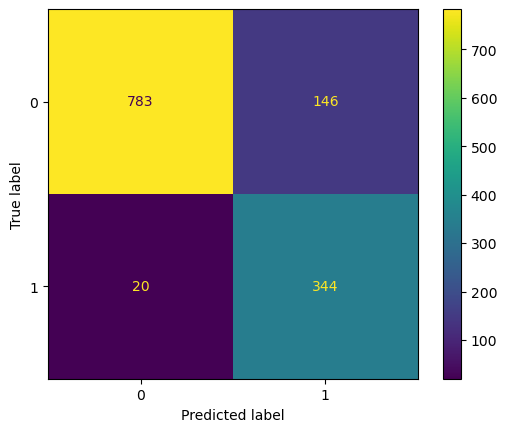

In [217]:
ConfusionMatrixDisplay.from_predictions(y_text , y_pred)

In [218]:
y_text.value_counts()

Prediction
0    929
1    364
Name: count, dtype: int64

In [219]:
accuracy_score(y_text ,y_pred)

0.871616395978345

In [220]:
print(classification_report(y_text , y_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90       929
           1       0.70      0.95      0.81       364

    accuracy                           0.87      1293
   macro avg       0.84      0.89      0.85      1293
weighted avg       0.90      0.87      0.88      1293



In [221]:
import numpy as np


In [222]:
error =[]
for k in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(x_train,y_train)
    pred =knn.predict(x_text)
    error.append(np.mean(pred != y_text))

In [223]:
error

[0.10827532869296211,
 0.10982211910286156,
 0.12296983758700696,
 0.11523588553750967,
 0.12838360402165508,
 0.1214230471771075,
 0.15158546017014696,
 0.14849187935034802,
 0.17246713070378963,
 0.16705336426914152,
 0.1871616395978345,
 0.18329466357308585,
 0.21500386697602475,
 0.21345707656612528,
 0.22815158546017014,
 0.2266047950502707,
 0.23588553750966745,
 0.23356535189481825,
 0.2459396751740139,
 0.24361948955916474,
 0.2559938128383604,
 0.2552204176334107,
 0.2699149265274555,
 0.2691415313225058,
 0.2822892498066512,
 0.28306264501160094,
 0.2954369682907966,
 0.2923433874709977,
 0.3039443155452436,
 0.300077339520495,
 0.30549110595514306,
 0.30549110595514306,
 0.31245166279969067,
 0.31245166279969067,
 0.3194122196442382,
 0.317092034029389,
 0.32637277648878577,
 0.32559938128383603,
 0.33410672853828305,
 0.3325599381283836]

In [224]:
knn = KNeighborsClassifier(n_neighbors= 1)

In [225]:
knn.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=1)

In [226]:
y_pred = knn.predict(x_text)

In [227]:
accuracy_score(y_text ,y_pred)

0.8917246713070379

In [228]:
#support vector machine
from sklearn.svm import SVC

In [229]:
# svm =SVC(kernel='linear')
# svm =SVC(kernel='rbf') # radial bases function default kernal
# svm =SVC(kernel='poly')
svm =SVC(kernel='sigmoid')

In [230]:
svm.fit(x_train ,y_train)

SVC(kernel='sigmoid')

In [231]:
y_pred = svm.predict(x_text)

In [232]:
accuracy_score(y_text ,y_pred)

0.839907192575406

In [233]:
# linear  = 0.9767981438515081
# rbf = 0.9450889404485692
# polynomial = 0.7548337200309359
# sigmoid = 0.839907192575406